 # Classification de Pokémon par Type (approche par statistiques)

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


### Chargement des données

In [ ]:
df = pd.read_csv("Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Nettoyage et préparation

In [ ]:
# Garder seulement les stats pertinentes
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
df = df[['Name'] + stats_cols + ['Type 1']]
df = df.dropna()

In [ ]:
df.head()

,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1
0,Bulbasaur,45,49,49,65,65,45,Grass
1,Ivysaur,60,62,63,80,80,60,Grass
2,Venusaur,80,82,83,100,100,80,Grass
3,VenusaurMega Venusaur,80,100,123,122,120,80,Grass
4,Charmander,39,52,43,60,50,65,Fire


In [ ]:
# Encode le type (label)
le = LabelEncoder()
df['TypeEncoded'] = le.fit_transform(df['Type 1'])

# Sauvegarder l'encodeur
joblib.dump(le, "../label_encoder.pkl")


['../label_encoder.pkl']

### Analyse Exploratoire

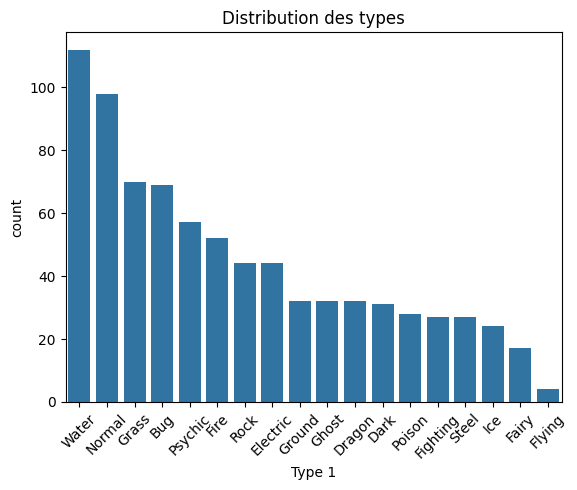

In [ ]:
sns.countplot(data=df, x='Type 1', order=df['Type 1'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution des types")
plt.show()


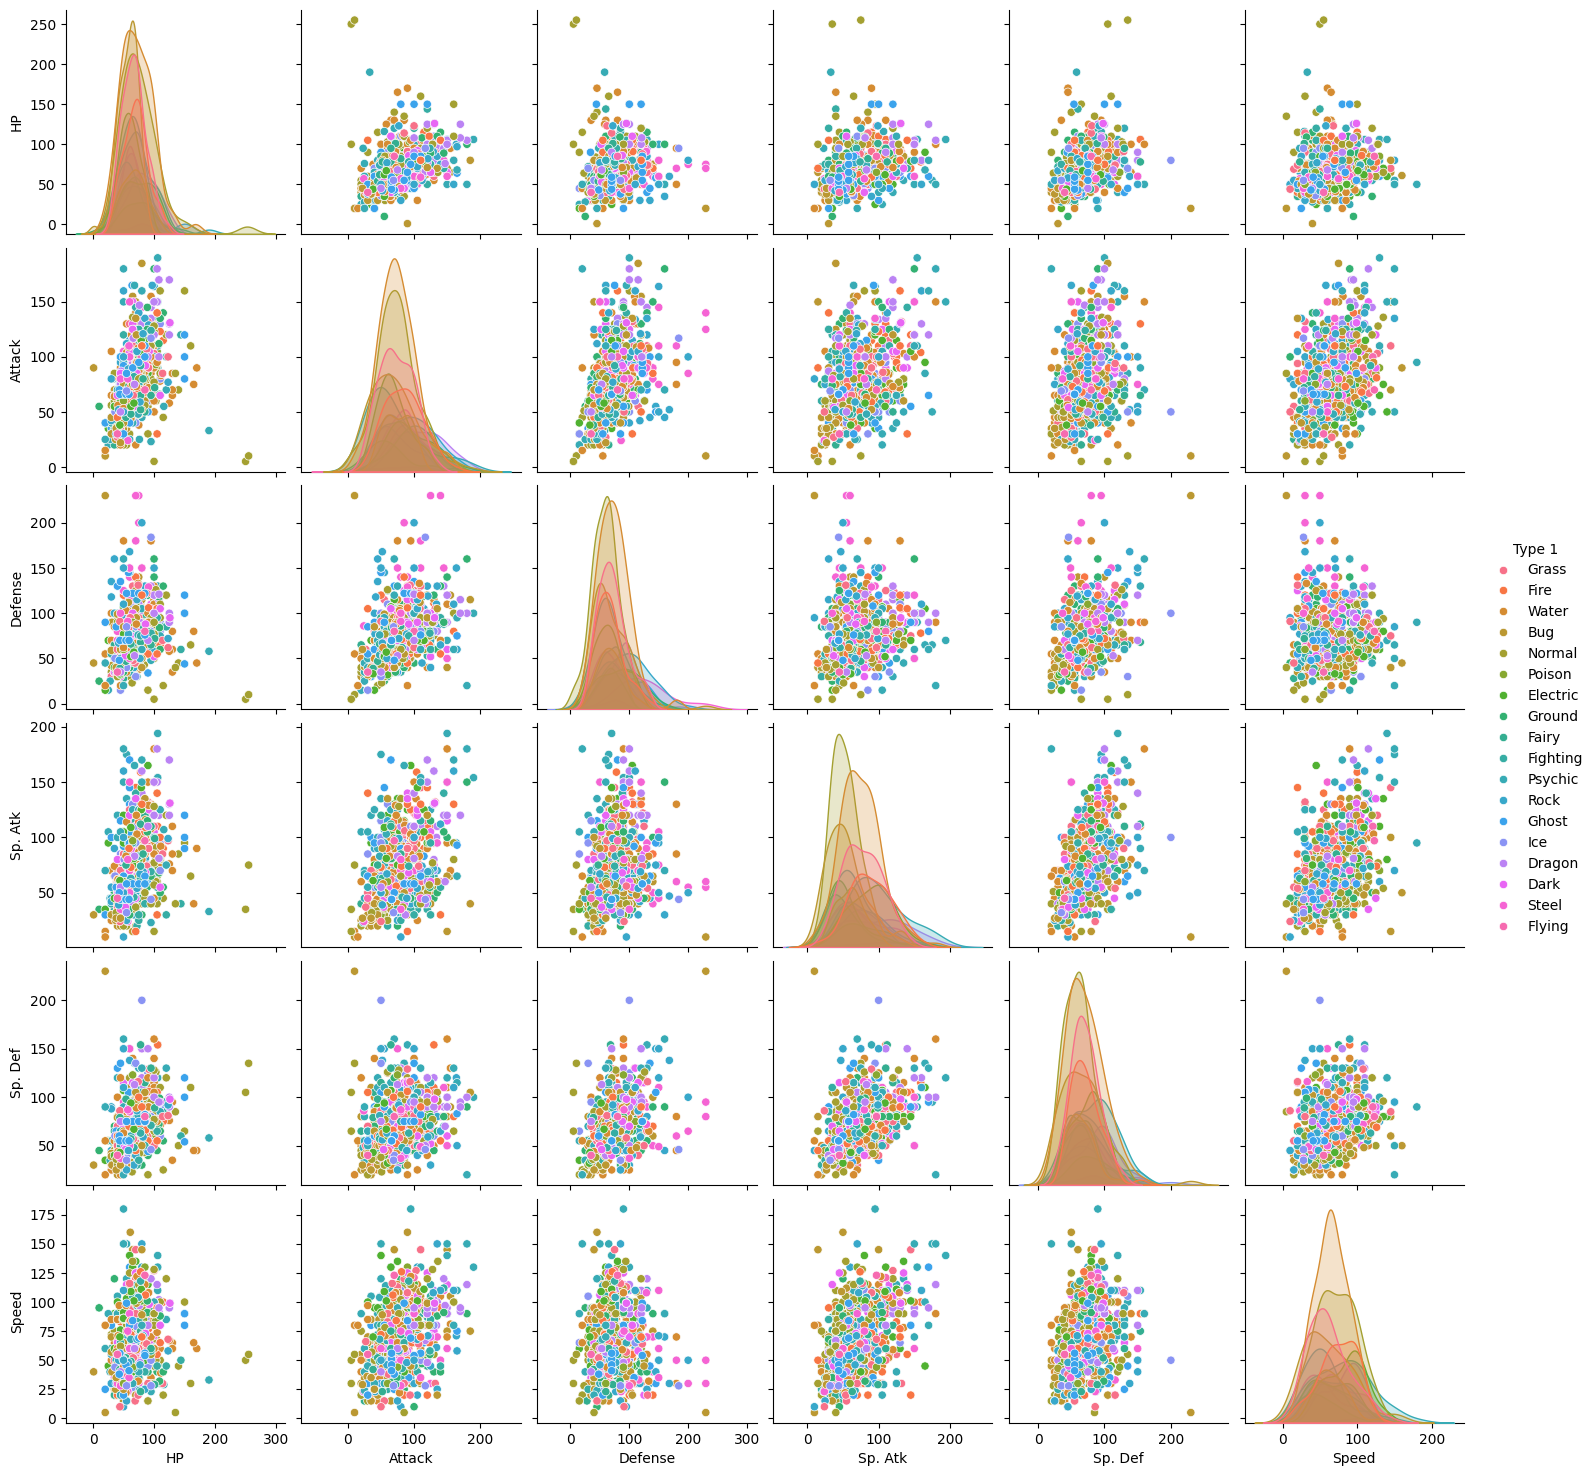

In [ ]:
sns.pairplot(df[stats_cols + ['Type 1']], hue="Type 1")
plt.show()

### Preparation des données pour ML

In [ ]:
X = df[stats_cols].values
y = df['TypeEncoded'].values

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "../scaler.pkl")

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


### Modélisation multi-algorithmes

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

results = {}

In [ ]:
for name, model in models.items():
    print(f"\n⏳ Entraînement du modèle : {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy pour {name} : {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    results[name] = acc


⏳ Entraînement du modèle : Random Forest
✅ Accuracy pour Random Forest : 0.2750
              precision    recall  f1-score   support

         Bug       0.36      0.57      0.44        14
        Dark       0.25      0.17      0.20         6
      Dragon       0.33      0.50      0.40         6
    Electric       0.12      0.11      0.12         9
       Fairy       0.00      0.00      0.00         3
    Fighting       0.33      0.20      0.25         5
        Fire       0.43      0.30      0.35        10
      Flying       0.00      0.00      0.00         1
       Ghost       0.50      0.33      0.40         6
       Grass       0.17      0.14      0.15        14
      Ground       0.33      0.17      0.22         6
         Ice       0.00      0.00      0.00         5
      Normal       0.44      0.60      0.51        20
      Poison       0.00      0.00      0.00         6
     Psychic       0.15      0.17      0.16        12
        Rock       0.23      0.33      0.27         9


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Accuracy pour SVM : 0.2875
              precision    recall  f1-score   support

         Bug       0.53      0.64      0.58        14
        Dark       0.00      0.00      0.00         6
      Dragon       0.25      0.33      0.29         6
    Electric       0.25      0.22      0.24         9
       Fairy       0.00      0.00      0.00         3
    Fighting       0.00      0.00      0.00         5
        Fire       0.00      0.00      0.00        10
      Flying       0.00      0.00      0.00         1
       Ghost       0.00      0.00      0.00         6
       Grass       0.00      0.00      0.00        14
      Ground       0.33      0.17      0.22         6
         Ice       0.00      0.00      0.00         5
      Normal       0.50      0.70      0.58        20
      Poison       0.00      0.00      0.00         6
     Psychic       0.22      0.17      0.19        12
        Rock       0.29      0.22      0.25         9
       Steel       0.00      0.00      0.00         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

✅ Accuracy pour MLP Classifier : 0.2313
              precision    recall  f1-score   support

         Bug       0.26      0.36      0.30        14
        Dark       0.00      0.00      0.00         6
      Dragon       0.33      0.17      0.22         6
    Electric       0.18      0.22      0.20         9
       Fairy       0.25      0.33      0.29         3
    Fighting       0.17      0.20      0.18         5
        Fire       0.12      0.10      0.11        10
      Flying       0.00      0.00      0.00         1
       Ghost       0.00      0.00      0.00         6
       Grass       0.18      0.14      0.16        14
      Ground       0.50      0.17      0.25         6
         Ice       0.00      0.00      0.00         5
      Normal       0.61      0.55      0.58        20
      Poison       0.00      0.00      0.00         6
     Psychic       0.28      0.42      0.33        12
        Rock       0.09      0.11      0.10         9
       Steel       0.17      0.17      0.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bei

### Comparaison performances


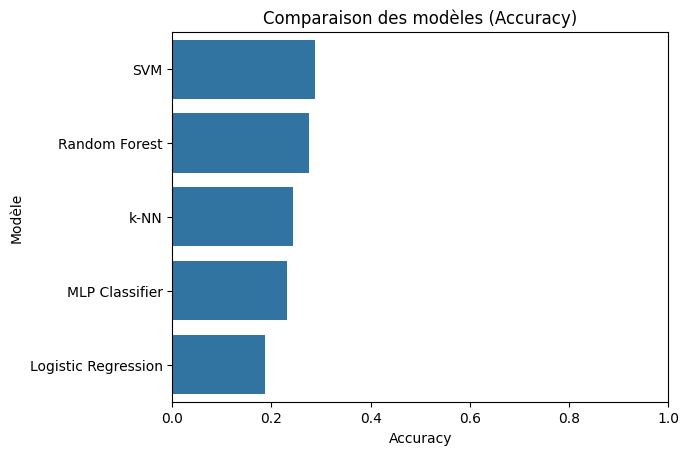

In [ ]:
result_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
result_df = result_df.sort_values(by='Accuracy', ascending=False)

sns.barplot(x=result_df.Accuracy, y=result_df.index)
plt.title("Comparaison des modèles (Accuracy)")
plt.xlabel("Accuracy")
plt.ylabel("Modèle")
plt.xlim(0, 1)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import joblib

In [ ]:
df = pd.read_csv("Pokemon.csv")
df = df.drop(columns=["#", "Name"])

# Feature engineering
df["IsDualType"] = df["Type 2"].notna().astype(int)
df["Type 2"] = df["Type 2"].fillna("None")
df["Legendary"] = df["Legendary"].astype(int)

# Ratios
df["Atk_Def_Ratio"] = df["Attack"] / (df["Defense"] + 1)
df["SpAtk_SpDef_Ratio"] = df["Sp. Atk"] / (df["Sp. Def"] + 1)

# Totaux physiques et spéciaux
df["Physical_Total"] = df["Attack"] + df["Defense"]
df["Special_Total"] = df["Sp. Atk"] + df["Sp. Def"]

# %% Encodage de la cible
le = LabelEncoder()
df["Type1_Label"] = le.fit_transform(df["Type 1"])

# Sauvegarde de l'encodeur
joblib.dump(le, "../label_encoder.pkl")

# %% One-hot encoding de Type 2
df = pd.get_dummies(df, columns=["Type 2"], prefix="Type2")

# %% Features et labels
features = df.drop(columns=["Type 1", "Type1_Label"])

feature_columns = features.columns.tolist()  # <-- NOUVEAU: Sauvegarde des colonnes
joblib.dump(feature_columns, "feature_columns.pkl")

X = features.values
y = df["Type1_Label"].values

# %% Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
#  Modèle XGBoost
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_xgb.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:51:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
model_xgb.save_model("pokemon_xgb.model")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:51:16] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [ ]:
# %% Évaluation
y_pred = model_xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy : {acc:.4f}")
print(classification_report(y_test, y_pred, target_names=le.classes_))


✅ Accuracy : 0.3063
              precision    recall  f1-score   support

         Bug       0.47      0.64      0.55        14
        Dark       0.00      0.00      0.00         6
      Dragon       0.50      0.50      0.50         6
    Electric       0.17      0.22      0.19         9
       Fairy       1.00      0.67      0.80         3
    Fighting       0.33      0.20      0.25         5
        Fire       0.30      0.30      0.30        10
      Flying       0.00      0.00      0.00         1
       Ghost       0.50      0.33      0.40         6
       Grass       0.23      0.21      0.22        14
      Ground       0.33      0.17      0.22         6
         Ice       0.00      0.00      0.00         5
      Normal       0.36      0.40      0.38        20
      Poison       0.17      0.17      0.17         6
     Psychic       0.36      0.42      0.38        12
        Rock       0.12      0.11      0.12         9
       Steel       0.20      0.17      0.18         6
      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


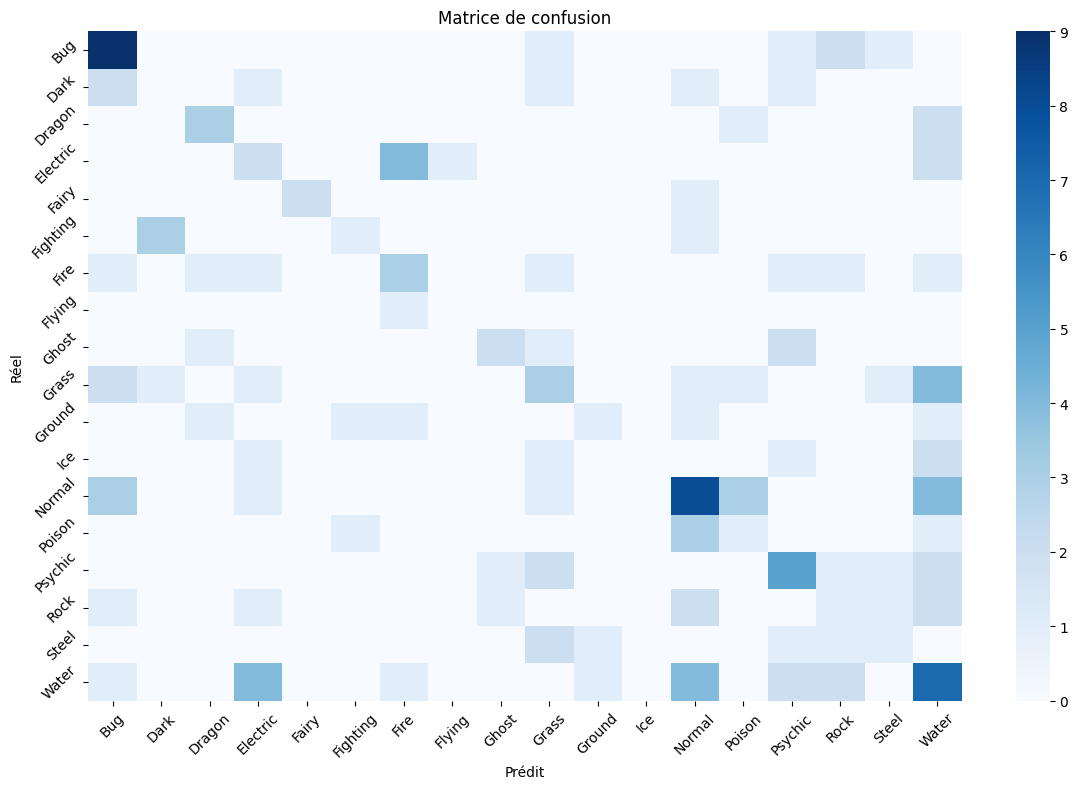

In [ ]:
# %% Matrice de confusion
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

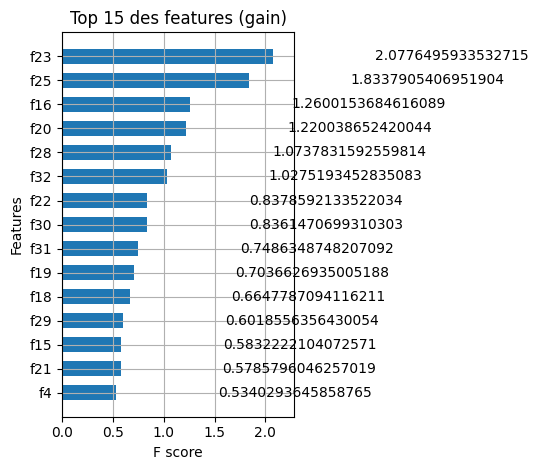

In [ ]:
# %% Importance des variables
xgb.plot_importance(model_xgb, max_num_features=15, importance_type="gain", height=0.6)
plt.title("Top 15 des features (gain)")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, top_k_accuracy_score
from sklearn.utils.class_weight import compute_sample_weight
import xgboost as xgb
import joblib

# %% Chargement des données
df = pd.read_csv("Pokemon.csv")
df = df.drop(columns=["#", "Name"])

# %% Feature engineering
df["IsDualType"] = df["Type 2"].notna().astype(int)
df["Type 2"] = df["Type 2"].fillna("None")
df["Legendary"] = df["Legendary"].astype(int)

# Ratios
df["Atk_Def_Ratio"] = df["Attack"] / (df["Defense"] + 1)
df["SpAtk_SpDef_Ratio"] = df["Sp. Atk"] / (df["Sp. Def"] + 1)

# Totaux physiques et spéciaux
df["Physical_Total"] = df["Attack"] + df["Defense"]
df["Special_Total"] = df["Sp. Atk"] + df["Sp. Def"]

# Vitesse catégorisée
df["Speed_Category"] = pd.cut(df["Speed"], bins=[0, 50, 100, 150], labels=["Slow", "Average", "Fast"])
df = pd.get_dummies(df, columns=["Speed_Category"], prefix="Speed")

# %% Encodage de la cible
le = LabelEncoder()
df["Type1_Label"] = le.fit_transform(df["Type 1"])

# Sauvegarde de l'encodeur
joblib.dump(le, "../label_encoder.pkl")

# %% One-hot encoding de Type 2
df = pd.get_dummies(df, columns=["Type 2"], prefix="Type2")

# %% Features et labels
features = df.drop(columns=["Type 1", "Type1_Label"])
X = features.values
y = df["Type1_Label"].values

# %% Normalisation
scaler = StandardScaler()
X = scaler.fit_transform(X)
joblib.dump(scaler, "../scaler.pkl")

# %% Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# %% Poids des classes pour le déséquilibre
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# %% Modèle XGBoost avec poids
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train, sample_weight=sample_weights)

# %% Évaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred)
top3_acc = top_k_accuracy_score(y_test, y_proba, k=3)

print(f"\n✅ Accuracy : {acc:.4f}")
print(f"🎯 Top-3 Accuracy : {top3_acc:.4f}\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:51:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Accuracy : 0.2750
🎯 Top-3 Accuracy : 0.5375

              precision    recall  f1-score   support

         Bug       0.60      0.64      0.62        14
        Dark       0.00      0.00      0.00         6
      Dragon       0.33      0.50      0.40         6
    Electric       0.18      0.22      0.20         9
       Fairy       0.50      0.67      0.57         3
    Fighting       0.00      0.00      0.00         5
        Fire       0.33      0.30      0.32        10
      Flying       0.50      1.00      0.67         1
       Ghost       0.50      0.33      0.40         6
       Grass       0.27      0.21      0.24        14
      Ground       0.20      0.17      0.18         6
         Ice       0.00      0.00      0.00         5
      Normal       0.39      0.35      0.37        20
      Poison       0.00      0.00      0.00         6
     Psychic       0.33      0.33      0.33        12
        Rock       0.00      0.00      0.00         9
       Steel       0.17      0.17

In [ ]:
pip install tensorflow scikit-learn pandas numpy


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import joblib

# Chargement des données
df = pd.read_csv("Pokemon.csv")
df = df.drop(columns=["#", "Name"])

# Feature engineering
df["IsDualType"] = df["Type 2"].notna().astype(int)
df["Type 2"] = df["Type 2"].fillna("None")
df["Legendary"] = df["Legendary"].astype(int)
df["Atk_Def_Ratio"] = df["Attack"] / (df["Defense"] + 1)
df["SpAtk_SpDef_Ratio"] = df["Sp. Atk"] / (df["Sp. Def"] + 1)
df["Physical_Total"] = df["Attack"] + df["Defense"]
df["Special_Total"] = df["Sp. Atk"] + df["Sp. Def"]
df["Speed_Category"] = pd.cut(df["Speed"], bins=[0, 50, 100, 150], labels=["Slow", "Average", "Fast"])
df = pd.get_dummies(df, columns=["Speed_Category"], prefix="Speed")
le = LabelEncoder()
df["Type1_Label"] = le.fit_transform(df["Type 1"])
df = pd.get_dummies(df, columns=["Type 2"], prefix="Type2")

# Préparation des features et labels
features = df.drop(columns=["Type 1", "Type1_Label"])
X = features.values
y = df["Type1_Label"].values
num_classes = len(np.unique(y))

# Normalisation
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# Modèle MLP
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraînement
model.fit(X_train, y_train_cat,
          validation_split=0.2,
          epochs=100,
          batch_size=32,
          sample_weight=sample_weights,
          callbacks=[early_stopping],
          verbose=1)

# Évaluation
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

from sklearn.metrics import classification_report, accuracy_score, top_k_accuracy_score
print("✅ Accuracy :", accuracy_score(y_test, y_pred))
print("🎯 Top-3 Accuracy :", top_k_accuracy_score(y_test, y_pred_proba, k=3))
print("\n" + classification_report(y_test, y_pred, target_names=le.classes_))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.0391 - loss: 3.1185 - val_accuracy: 0.0312 - val_loss: 2.8022
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0421 - loss: 3.0465 - val_accuracy: 0.0391 - val_loss: 2.7753
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0793 - loss: 2.8559 - val_accuracy: 0.0234 - val_loss: 2.7608
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1063 - loss: 2.9132 - val_accuracy: 0.0391 - val_loss: 2.7541
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0890 - loss: 2.8478 - val_accuracy: 0.0469 - val_loss: 2.7388
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0753 - loss: 2.7297 - val_accuracy: 0.0547 - val_loss: 2.7251
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1183 - loss: 2.6943 - val_accuracy: 0.0625 - val_loss: 2.7003
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1222 - loss: 2.7414 - val_accuracy: 0.

In [ ]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraînement
model.fit(X_train, y_train_cat,
          validation_split=0.2,
          epochs=30,
          batch_size=32,
          sample_weight=sample_weights,
          callbacks=[early_stopping],
          verbose=1)

# Évaluation
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

from sklearn.metrics import classification_report, accuracy_score, top_k_accuracy_score
print("✅ Accuracy :", accuracy_score(y_test, y_pred))
print("🎯 Top-3 Accuracy :", top_k_accuracy_score(y_test, y_pred_proba, k=3))
print("\n" + classification_report(y_test, y_pred, target_names=le.classes_))


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.2440 - loss: 2.1564 - val_accuracy: 0.1484 - val_loss: 2.4915
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2829 - loss: 2.0603 - val_accuracy: 0.1562 - val_loss: 2.5153
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.2778 - loss: 1.9658 - val_accuracy: 0.1406 - val_loss: 2.5100
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.2721 - loss: 1.9801 - val_accuracy: 0.1484 - val_loss: 2.5038
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2792 - loss: 2.0452 - val_accuracy: 0.1562 - val_loss: 2.4861
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3016 - loss: 2.0001 - val_accuracy: 0.1641 - val_loss: 2.4807
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2989 - loss: 1.9924 - val_accuracy: 0.1562 - val_loss: 2.4945
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3232 - loss: 1.9383 - val_accuracy: 0.1719 - v

In [ ]:
# Chargement
df = pd.read_csv("Pokemon.csv")
df = df.drop(columns=["#", "Name"])
df["Type 2"] = df["Type 2"].fillna("None")
df["Legendary"] = df["Legendary"].astype(int)

# Encodage cible
le = LabelEncoder()
df["Type1_Label"] = le.fit_transform(df["Type 1"])

# Encodage one-hot pour Type 2
df = pd.get_dummies(df, columns=["Type 2"], prefix="Type2")

# Features / target
X = df.drop(columns=["Type 1", "Type1_Label"]).values
y = df["Type1_Label"].values
num_classes = len(np.unique(y))

# Normalisation
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train_cat, validation_split=0.2,
          epochs=200, batch_size=32, sample_weight=sample_weights,
          callbacks=[EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

# Évaluation
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Top-3 Accuracy :", top_k_accuracy_score(y_test, y_pred_proba, k=3))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.0459 - loss: 3.1973 - val_accuracy: 0.0938 - val_loss: 2.7963
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0751 - loss: 2.9848 - val_accuracy: 0.1094 - val_loss: 2.7640
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0831 - loss: 2.8444 - val_accuracy: 0.1250 - val_loss: 2.7473
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0979 - loss: 2.9988 - val_accuracy: 0.1328 - val_loss: 2.7355
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0700 - loss: 2.7646 - val_accuracy: 0.1484 - val_loss: 2.7265
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0869 - loss: 2.8390 - val_accuracy: 0.1484 - val_loss: 2.7177
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1241 - loss: 2.7620 - val_accuracy: 0.1641 - val_loss: 2.7080
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1016 - loss: 2.8281 - val_accuracy: 0.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, top_k_accuracy_score
from sklearn.pipeline import make_pipeline

# --- Préparation des données ---
df = pd.read_csv("Pokemon.csv")
df = df.drop(columns=["#", "Name"])

# Feature engineering
df["IsDualType"] = df["Type 2"].notna().astype(int)
df["Type 2"] = df["Type 2"].fillna("None")
df["Legendary"] = df["Legendary"].astype(int)
df["Atk_Def_Ratio"] = df["Attack"] / (df["Defense"] + 1)
df["SpAtk_SpDef_Ratio"] = df["Sp. Atk"] / (df["Sp. Def"] + 1)
df["Physical_Total"] = df["Attack"] + df["Defense"]
df["Special_Total"] = df["Sp. Atk"] + df["Sp. Def"]
df["Speed_Category"] = pd.cut(df["Speed"], bins=[0, 50, 100, 150], labels=["Slow", "Average", "Fast"])
df = pd.get_dummies(df, columns=["Speed_Category", "Type 2"], prefix=["Speed", "Type2"])

# Cible
le = LabelEncoder()
df["Type1_Label"] = le.fit_transform(df["Type 1"])

# Features / labels
X = df.drop(columns=["Type 1", "Type1_Label"]).values
y = df["Type1_Label"].values
num_classes = len(np.unique(y))

# Normalisation
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)

# --- Modèles de base ---
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
clf_mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# --- 1. VotingClassifier (soft vote) ---
# Voting sans sample_weight pour MLPClassifier
voting = VotingClassifier(
    estimators=[
        ("rf", RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)),
        ("xgb", XGBClassifier(eval_metric="mlogloss", random_state=42)),
        ("mlp", MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42))
    ],
    voting="soft"
)

print("🔁 Entraînement VotingClassifier...")
voting.fit(X_train, y_train)

y_pred_vote = voting.predict(X_test)
y_pred_vote_proba = voting.predict_proba(X_test)

print("\n✅ Résultats VotingClassifier :")
print("Accuracy :", accuracy_score(y_test, y_pred_vote))
print("Top-3 Accuracy :", top_k_accuracy_score(y_test, y_pred_vote_proba, k=3))
print(classification_report(y_test, y_pred_vote, target_names=le.classes_))

# --- 2. StackingClassifier ---
stacking = StackingClassifier(
    estimators=[("rf", clf_rf), ("xgb", clf_xgb)],
    final_estimator=MLPClassifier(hidden_layer_sizes=(64,), max_iter=300, random_state=42),
    passthrough=True
)

print("\n🔁 Entraînement StackingClassifier...")
stacking.fit(X_train, y_train)

y_pred_stack = stacking.predict(X_test)
y_pred_stack_proba = stacking.predict_proba(X_test)

print("\n✅ Résultats StackingClassifier :")
print("Accuracy :", accuracy_score(y_test, y_pred_stack))
print("Top-3 Accuracy :", top_k_accuracy_score(y_test, y_pred_stack_proba, k=3))
print(classification_report(y_test, y_pred_stack, target_names=le.classes_))


🔁 Entraînement VotingClassifier...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bei


✅ Résultats VotingClassifier :
Accuracy : 0.31875
Top-3 Accuracy : 0.58125
              precision    recall  f1-score   support

         Bug       0.40      0.57      0.47        14
        Dark       0.12      0.17      0.14         6
      Dragon       0.43      0.50      0.46         6
    Electric       0.25      0.33      0.29         9
       Fairy       0.50      0.33      0.40         3
    Fighting       0.00      0.00      0.00         5
        Fire       0.33      0.20      0.25        10
      Flying       0.00      0.00      0.00         1
       Ghost       0.60      0.50      0.55         6
       Grass       0.18      0.14      0.16        14
      Ground       0.67      0.33      0.44         6
         Ice       0.00      0.00      0.00         5
      Normal       0.44      0.40      0.42        20
      Poison       0.10      0.17      0.12         6
     Psychic       0.50      0.58      0.54        12
        Rock       0.17      0.11      0.13         9
     

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:52:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:52:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:52:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(s


✅ Résultats StackingClassifier :
Accuracy : 0.30625
Top-3 Accuracy : 0.61875
              precision    recall  f1-score   support

         Bug       0.47      0.57      0.52        14
        Dark       0.20      0.17      0.18         6
      Dragon       0.60      0.50      0.55         6
    Electric       0.20      0.22      0.21         9
       Fairy       1.00      0.67      0.80         3
    Fighting       0.33      0.40      0.36         5
        Fire       0.22      0.20      0.21        10
      Flying       0.00      0.00      0.00         1
       Ghost       0.33      0.50      0.40         6
       Grass       0.14      0.14      0.14        14
      Ground       0.33      0.33      0.33         6
         Ice       0.00      0.00      0.00         5
      Normal       0.42      0.50      0.45        20
      Poison       0.20      0.17      0.18         6
     Psychic       0.36      0.42      0.38        12
        Rock       0.00      0.00      0.00         9
   

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bei

##  CNN

In [ ]:
# Cellule 1 : Imports
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
# Cellule 2 : Extraction du fichier ZIP contenant les images
zip_path = "PokemonData.zip"
extract_dir = "pokemon_images"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [ ]:
extract_dir='pokemon_images/PokemonData'

In [ ]:
# Cellule 3 : Chargement du CSV tabulaire pour les types
df = pd.read_csv("Pokemon.csv")
df = df[df["Name"].isin(os.listdir(extract_dir))]  # Filtrer les 150 Pokémon communs
df = df[["Name", "Type 1"]]  # On garde que les colonnes nécessaires
df = df.set_index("Name")


In [ ]:
df.head()

,Type 1
Name,
Bulbasaur,Grass
Ivysaur,Grass
Venusaur,Grass
Charmander,Fire
Charmeleon,Fire


In [ ]:
# Cellule 4 : Prétraitement des images
IMAGE_SIZE = (64, 64)

X_images = []
y_labels = []

df.index = df.index.str.lower()  # Harmoniser noms en minuscules
df = df[~df.index.duplicated()]  # Supprimer doublons potentiels

for name in os.listdir(extract_dir):
    folder_path = os.path.join(extract_dir, name)
    if not os.path.isdir(folder_path):
        continue

    name_lower = name.lower()  # Nom du dossier en minuscules

    if name_lower not in df.index:
        print(f"{name_lower} pas trouvé dans df.index")
        continue  # On ignore ce dossier

    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        try:
            img = Image.open(img_path).convert("RGB").resize(IMAGE_SIZE)
            X_images.append(np.array(img))
            y_labels.append(df.loc[name_lower]["Type 1"])  # On récupère le type
        except Exception as e:
            print(f"Erreur sur {img_path} : {e}")

X_images = np.array(X_images) / 255.0  # Normalisation


farfetchd pas trouvé dans df.index
alolan sandslash pas trouvé dans df.index
mrmime pas trouvé dans df.index


In [ ]:
df.head()

,Type 1
Name,
bulbasaur,Grass
ivysaur,Grass
venusaur,Grass
charmander,Fire
charmeleon,Fire


In [ ]:
# Cellule 5 : Encodage des labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_labels)
y_categorical = to_categorical(y_encoded)

num_classes = len(label_encoder.classes_)
print("Nombre de classes :", num_classes)


Nombre de classes : 15


In [ ]:
print(f"X_images shape: {X_images.shape}")
print(f"y_categorical shape: {y_categorical.shape}")
print(f"df shape: {df.shape}")


X_images shape: (6686, 64, 64, 3)
y_categorical shape: (6686, 15)
df shape: (147, 1)


In [ ]:
# Cellule 6 : Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_images, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)


In [ ]:
# Cellule 7 : Modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=3)])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Cellule 8 : Entraînement
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 36s 198ms/step - accuracy: 0.2550 - loss: 2.3502 - top_k_categorical_accuracy: 0.4902 - val_accuracy: 0.4126 - val_loss: 1.8513 - val_top_k_categorical_accuracy: 0.6756
Epoch 2/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 38s 226ms/step - accuracy: 0.4215 - loss: 1.7822 - top_k_categorical_accuracy: 0.7016 - val_accuracy: 0.4858 - val_loss: 1.6108 - val_top_k_categorical_accuracy: 0.7504
Epoch 3/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 38s 209ms/step - accuracy: 0.5290 - loss: 1.4527 - top_k_categorical_accuracy: 0.7963 - val_accuracy: 0.5389 - val_loss: 1.4391 - val_top_k_categorical_accuracy: 0.8087
Epoch 4/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 35s 208ms/step - accuracy: 0.6229 - loss: 1.1413 - top_k_categorical_accuracy: 0.8777 - val_accuracy: 0.5815 - val_loss: 1.3135 - val_top_k_categorical_accuracy: 0.8453
Epoch 5/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 40s 200ms/step - accuracy: 0.6996 - loss: 0.9016 - top_k_categorical_accuracy: 0.9169 - val_accuracy: 0.6039 - val_loss: 1.2

In [ ]:
# Cellule 9 : Évaluation
test_loss, test_acc, top3_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"✅ Accuracy : {test_acc:.4f}")
print(f"🎯 Top-3 Accuracy : {top3_acc:.4f}")


✅ Accuracy : 0.6121
🎯 Top-3 Accuracy : 0.8423


In [ ]:
# Cellule 10 : Sauvegarde du modèle
model.save("pokemon_cnn_model.keras")
np.save("pokemon_cnn_classes.npy", label_encoder.classes_)


# FUSION

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import joblib

In [ ]:
# Charger le modèle CNN
model_cnn = load_model("/content/pokemon_cnn_model.keras")


In [ ]:
# Charger les classes du CNN
cnn_classes = np.load("/content/pokemon_cnn_classes.npy", allow_pickle=True)
label_encoder = LabelEncoder()
label_encoder.classes_ = cnn_classes

In [ ]:
scaler = joblib.load("../scaler.pkl")
le_stats = joblib.load("../label_encoder.pkl") # Votre encodeur initial

In [ ]:
scaler = StandardScaler()
le_stats = LabelEncoder()

In [ ]:
df = pd.read_csv("Pokemon.csv")

# Nettoyage cohérent avec votre premier modèle
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X_stats = scaler.fit_transform(df[stats_cols])

# Filtrer les Pokémon ayant les deux représentations
valid_names = [name for name in df['Name'] if name.lower() in cnn_classes]
df_combined = df[df['Name'].isin(valid_names)].copy()

In [ ]:
# Filtrer les Pokémon ayant les deux représentations
valid_names = [name for name in df['Name'] if name.lower() in cnn_classes]
df_combined = df[df['Name'].isin(valid_names)].copy()

In [ ]:
# 3. Générer les features fusionnées
# ---------------
def get_fusion_features(df):
    # Features statistiques (XGBoost)
    X_stats_scaled = scaler.transform(df[stats_cols])
    xgb_features = model_xgb.predict_proba(X_stats_scaled)

    # Features images (CNN)
    cnn_features = []
    for name in df['Name']:
        # Adaptez ce chemin à votre structure d'images
        img = load_img(f"pokemon_images/PokemonData/{name}/images.jpg", target_size=(64,64))
        img_array = img_to_array(img)/255.0
        cnn_pred = model_cnn.predict(img_array[np.newaxis, ...], verbose=0)
        cnn_features.append(cnn_pred[0])

    return np.concatenate([xgb_features, np.array(cnn_features)], axis=1)


In [ ]:
# Charger les données statistiques nettoyées (comme dans votre code initial)
df = pd.read_csv("Pokemon.csv")
df['LowerName'] = df['Name'].str.lower().str.replace(' ', '').str.replace('-', '')
df = df.set_index('LowerName')

# Paramètres images (de votre code)
IMAGE_SIZE = (64, 64)
extract_dir='pokemon_images/PokemonData'

# Structures pour l'alignement
X_images = []
X_stats = []
y_labels = []

# Parcourir les dossiers d'images
for img_folder in os.listdir(extract_dir):
    folder_path = os.path.join(extract_dir, img_folder)
    if not os.path.isdir(folder_path):
        continue

    # Nettoyer le nom du dossier
    clean_name = img_folder.lower().replace(' ', '').replace('-', '')

    # Vérifier la correspondance avec les stats
    if clean_name not in df.index:
        print(f"{clean_name} non trouvé dans les stats - ignoré")
        continue

    # Charger la première image trouvée (adaptez si besoin)
    img_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg'))]
    if not img_files:
        continue

    try:
        # Chargement de l'image
        img_path = os.path.join(folder_path, img_files[0])
        img = Image.open(img_path).convert('RGB').resize(IMAGE_SIZE)
        img_array = np.array(img) / 255.0

        # Récupération des stats correspondantes
        stats = df.loc[clean_name][['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].values

        # Stockage
        X_images.append(img_array)
        X_stats.append(stats)
        y_labels.append(df.loc[clean_name]['Type 1'])

    except Exception as e:
        print(f"Erreur sur {img_folder} : {e}")

# Conversion finale
X_images = np.array(X_images)
X_stats = np.array(X_stats)
y_labels = np.array(y_labels)

farfetchd non trouvé dans les stats - ignoré
alolansandslash non trouvé dans les stats - ignoré
mrmime non trouvé dans les stats - ignoré


In [ ]:
# --------------------------------------------------
# 1. Chargement des données alignées (version corrigée)
# --------------------------------------------------
import os
import re
import pandas as pd
import numpy as np
from PIL import Image

# Charger les stats
df_stats = pd.read_csv("Pokemon.csv")
df_stats['CleanName'] = df_stats['Name'].str.lower().apply(lambda x: re.sub('[^a-z]', '', x))
df_stats = df_stats.set_index('CleanName')

# Paramètres images
extract_dir = "pokemon_images/PokemonData"
IMAGE_SIZE = (64, 64)

X_images = []
X_stats = []
y_labels = []

df.index = df.index.str.lower()
df = df[~df.index.duplicated()]

# Colonnes stats à extraire (vérifiez leur présence dans votre CSV)
stats_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

for name in os.listdir(extract_dir):
    folder_path = os.path.join(extract_dir, name)
    if not os.path.isdir(folder_path):
        continue

    name_lower = name.lower()

    if name_lower not in df.index:
        print(f"{name_lower} pas trouvé dans df.index")
        continue

    # Vérification critique des données
    try:
        stats = df.loc[name_lower, stats_columns].astype(float).values
        assert len(stats) == 6  # Force la vérification des 6 valeurs
    except Exception as e:
        print(f"Stats invalides pour {name_lower} : {e}")
        continue

    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        try:
            img = Image.open(img_path).convert("RGB").resize(IMAGE_SIZE)
            X_images.append(np.array(img)/255.0)
            X_stats.append(stats)  # Utilisez le même stats pour toutes les images du Pokémon
            y_labels.append(df.loc[name_lower]["Type 1"])
        except Exception as e:
            print(f"Erreur sur {img_path} : {e}")

# Conversion finale avec vérification
try:
    X_images = np.array(X_images)
    X_stats = np.array(X_stats)
    y_labels = np.array(y_labels)
except ValueError as e:
    print("Erreur de shape finale !")
    print("Dimensions détectées :")
    print(f"X_images: {[x.shape for x in X_images[:10]]}")  # Affiche les 10 premiers
    print(f"X_stats: {[len(s) for s in X_stats[:10]]}")
    raise e

farfetchd pas trouvé dans df.index
alolan sandslash pas trouvé dans df.index
mrmime pas trouvé dans df.index


In [ ]:
print(f"X_images shape: {X_images.shape}")
print(f"x_stats: {X_stats.shape}")
print(f"y_labels: {y_labels.shape}")

X_images shape: (6686, 64, 64, 3)
x_stats: (6686, 6)
y_labels: (6686,)


#Pipeline

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import joblib

class PokemonFeatureEngineer(BaseEstimator, TransformerMixin):
    """Automatise tout le feature engineering."""

    def __init__(self):
        self.type2_categories_ = None
        self.required_columns_ = [
            'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
            'Type 2', 'Legendary'
        ]

    def fit(self, X, y=None):
        # Stocker les catégories Type2 pour l'encodage
        self.type2_categories_ = X['Type 2'].fillna('None').unique()
        return self

    def transform(self, X):
        X = X[self.required_columns_].copy()

        # Feature engineering
        X["IsDualType"] = X["Type 2"].notna().astype(int)
        X["Atk_Def_Ratio"] = X["Attack"] / (X["Defense"] + 1)
        X["SpAtk_SpDef_Ratio"] = X["Sp. Atk"] / (X["Sp. Def"] + 1)
        X["Physical_Total"] = X["Attack"] + X["Defense"]
        X["Special_Total"] = X["Sp. Atk"] + X["Sp. Def"]

        # One-hot encoding contrôlé
        for cat in self.type2_categories_:
            X[f"Type2_{cat}"] = (X["Type 2"].fillna('None') == cat).astype(int)

        return X.drop(columns=["Type 2"])

In [ ]:
# 3. COLLECTE DES DONNÉES ALIGNÉES (VERSION CORRIGÉE)
# --------------------------------------------------
# Config
extract_dir = "pokemon_images/PokemonData"
IMAGE_SIZE = (64, 64)
stats_columns = [
    'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
    'Type 2', 'Legendary'  # Colonnes complètes
]

# Charger le CSV original
df_source = pd.read_csv("Pokemon.csv")
df_source['CleanName'] = (
    df_source['Name']
    .str.lower()
    .str.replace('[^a-z]', '', regex=True)
)
df_source = df_source.set_index('CleanName')

# Collecte
X_images = []
X_stats = []
y_labels = []

for folder in os.listdir(extract_dir):
    folder_path = os.path.join(extract_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    clean_name = re.sub('[^a-z]', '', folder.lower())

    try:
        # Récupération des données (garantir une seule ligne)
        pokemon_data = df_source.loc[[clean_name]].iloc[0]  # Modification clé ici

        # Stockage des stats
        stats = [pokemon_data[col] for col in stats_columns]

        # Parcours des images
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img = Image.open(os.path.join(folder_path, img_file))
                img = img.convert("RGB").resize(IMAGE_SIZE)
                X_images.append(np.array(img)/255.0)
                X_stats.append(stats)
                y_labels.append(str(pokemon_data['Type 1']))  # Conversion en string explicite

    except KeyError:
        print(f"{clean_name} non trouvé")
        continue

# Conversion finale
X_images = np.array(X_images)
X_stats = pd.DataFrame(X_stats, columns=stats_columns)
y_labels = np.array(y_labels)

alolansandslash non trouvé


In [ ]:
print(f"X_images shape: {X_images.shape}")
print(f"x_stats: {X_stats.shape}")
print(f"y_labels: {y_labels.shape}")

X_images shape: (6779, 64, 64, 3)
x_stats: (6779, 8)
y_labels: (6779,)


In [ ]:
# --------------------------------------------------
# 4. PIPELINE COMPLET ET PRÉDICTIONS
# --------------------------------------------------
# Création du pipeline
pipeline = Pipeline([
    ('feature_engineer', PokemonFeatureEngineer()),
    ('scaler', StandardScaler())
])

In [ ]:
# Entraînement du pipeline sur les données sources
pipeline.fit(df_source[stats_columns])

# Transformation des données alignées
X_stats_transformed = pipeline.transform(X_stats)

In [ ]:
feature_columns = joblib.load("feature_columns.pkl")  # 33 colonnes attendues

# Supposons que X_stats_transformed est un array numpy de shape (N, 31)
# Ajouter manuellement les 2 colonnes manquantes remplies de 0
missing = 33 - X_stats_transformed.shape[1]
X_stats_transformed = np.hstack([
    X_stats_transformed,
    np.zeros((X_stats_transformed.shape[0], missing))
])

# Convertir en DataFrame avec les bonnes colonnes
X_stats_transformed = pd.DataFrame(X_stats_transformed, columns=feature_columns)

# --------------------------------------------------
# 2. VÉRIFICATION
# --------------------------------------------------
print("Shape vérifié :", X_stats_transformed.shape)  # (6779, 33)
print("Colonnes manquantes :", set(feature_columns) - set(X_stats_transformed.columns))

Shape vérifié : (6779, 33)
Colonnes manquantes : set()


In [ ]:
# --------------------------------------------------
xgb_probas = model_xgb.predict_proba(X_stats_transformed.values)
cnn_probas = model_cnn.predict(X_images)
X_fusion = np.concatenate([xgb_probas, cnn_probas], axis=1)

print("Fusion réussie ! Shape final :", X_fusion.shape)

212/212 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step
Fusion réussie ! Shape final : (6779, 33)


In [ ]:
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, classification_report, top_k_accuracy_score

# Rechargement de l'encodeur du modèle XGBoost
le_stats = joblib.load("../label_encoder.pkl")  # adapte le chemin si nécessaire
xgb_classes = le_stats.classes_

# Encodeur utilisé pour le CNN
# Remplace ceci par ton encodeur si tu en as déjà un :
# label_encoder = LabelEncoder().fit(list_des_classes_de_cnn)
cnn_classes = label_encoder.classes_  # remplace bien ici

# Étendre les probabilités CNN vers la taille des classes XGBoost
cnn_probas_extended = np.zeros((cnn_probas.shape[0], len(xgb_classes)))

for i, class_name in enumerate(cnn_classes):
    if class_name in xgb_classes:
        idx = list(xgb_classes).index(class_name)
        cnn_probas_extended[:, idx] = cnn_probas[:, i]
    else:
        print(f"⚠️ Classe '{class_name}' absente du modèle XGBoost")




In [ ]:
xgb_classes

array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'], dtype=object)

In [ ]:
cnn_classes

array(['Bug', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Ghost',
       'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock',
       'Water'], dtype='<U8')

In [ ]:
# Fusion simple pondérée
alpha = 0.5
beta = 0.5
probas_fusion = alpha * xgb_probas + beta * cnn_probas_extended

# Prédictions finales
y_pred = np.argmax(probas_fusion, axis=1)

# Encodage réel des labels
y_encoded = le_stats.transform(y_labels)  # y_labels est la liste des vrais types

# Évaluation
print("✅ Accuracy :", accuracy_score(y_encoded, y_pred))
# Forcer les labels attendus par y_score
print("🎯 Top-3 Accuracy :", top_k_accuracy_score(y_encoded, probas_fusion, k=3, labels=np.arange(len(xgb_classes))))


✅ Accuracy : 0.9079510252249594
🎯 Top-3 Accuracy : 0.9510252249594335


In [ ]:
# Trouver les classes présentes réellement dans y_encoded
labels_present = np.unique(y_encoded)
class_names_present = [xgb_classes[i] for i in labels_present]

# Rapport de classification corrigé
print("\n📊 Rapport de classification :\n", classification_report(
    y_encoded,
    y_pred,
    labels=labels_present,
    target_names=class_names_present
))


📊 Rapport de classification :
               precision    recall  f1-score   support

         Bug       0.79      0.93      0.85       534
      Dragon       0.98      0.84      0.90       116
    Electric       0.93      0.90      0.92       449
       Fairy       1.00      0.89      0.94        84
    Fighting       0.88      0.89      0.88       337
        Fire       0.93      0.94      0.93       536
       Ghost       0.96      0.94      0.95       141
       Grass       0.91      0.93      0.92       584
      Ground       0.97      0.87      0.92       342
         Ice       1.00      0.88      0.94        94
      Normal       0.88      0.94      0.91       983
      Poison       0.91      0.94      0.92       544
     Psychic       0.92      0.77      0.84       347
        Rock       0.95      0.88      0.91       376
       Water       0.93      0.91      0.92      1312

    accuracy                           0.91      6779
   macro avg       0.93      0.90      0.91     

In [ ]:
feature_columns

['Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary',
 'IsDualType',
 'Atk_Def_Ratio',
 'SpAtk_SpDef_Ratio',
 'Physical_Total',
 'Special_Total',
 'Type2_Bug',
 'Type2_Dark',
 'Type2_Dragon',
 'Type2_Electric',
 'Type2_Fairy',
 'Type2_Fighting',
 'Type2_Fire',
 'Type2_Flying',
 'Type2_Ghost',
 'Type2_Grass',
 'Type2_Ground',
 'Type2_Ice',
 'Type2_None',
 'Type2_Normal',
 'Type2_Poison',
 'Type2_Psychic',
 'Type2_Rock',
 'Type2_Steel',
 'Type2_Water']

In [ ]:
joblib.dump(model_xgb, "model_xgb.pkl")
model_cnn.save("model_cnn.h5")
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(feature_columns, "feature_columns.pkl")


['feature_columns.pkl']

In [ ]:
from google.colab import files

files.download("model_xgb.pkl")
files.download("model_cnn.h5")
files.download("label_encoder.pkl")
files.download("feature_columns.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
np.save("pokemon_cnn_classes.npy", label_encoder.classes_)

In [ ]:
from google.colab import files
files.download("pokemon_cnn_classes.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Sauvegarder l'encodeur avec TOUTES les classes (18)
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [ ]:
from google.colab import files
files.download("label_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>